# Projekat 1 - 20 bodova

**Rok za predaju je ponedeljak 12.04.2021 do kraja dana. Projekti se predaju slanjem na email (grakocevic@raf.rs)**.

U VCF fajlu su dati rezultati studije u kojoj su prikupljani podaci o mutacijama u određenoj populaciji (tabela sa imenom eksperimenta koji je dodeljen svakom studentu je data u fajlu Lista zadataka 2021). Osobe zahvaćene nekom bolešću su označene kao *case_x*, a zdrave osobe sa *control_x*.

Kao rezultat projekta se potrebno je predati:  
1. Kod kojim su generisani rezultati (ipynb ili python skripta)
2. Kraći izveštaj sa tekstualnim odgovorima na pitanja i grafikonima **u PDF formatu**  
  
Fajlove nazvati po šablonu: ime_prezime_III-GG_bix-1.ipynb/py i ime_prezime_III-GG_bix-1.pdf (pri čemu su III i GG broj indeksa i godina upisa).

---


Projekat je moguće raditi pojedinačno ili u paru. **Ukoliko se projekat radi u paru, svaki student treba da obradi podatke iz eksperimenta koji mu dodeljen, a rad u paru se odnosi na programski kod i šablon za tekstualni izveštaj.** Projekte rađene u paru predaje jedan od dva studenta, pri čemu je potrebno poslati 4 fajla (po jedan fajl sa kodom i jedan PDF izvestaj za svakoga), i tom prilikom onog drugog stavlja u CC. 

Pitanja:

1. [1 bod] Koliko je subjekata ukupno učestvovalo u studiji? Koliko njih su oboleli, a koliko zdravi?
 
2. [1 bod] Koliko je ukupno mutacija posmatrano u populaciji. Dati tabelu sa brojem mutacija po hromozomu.
   
3. [4 boda] Nacrtati sledeće histograme, pri čemu odvojeno prikazati podatke dobijene iz zdravih i obolelih pacijenata (po dva histograma na istom grafiku):  
  3a. [1 boda] Frekvencije ređih alela (minor allele frequency, MAF) za svaku mutaciju u studiji  
  3b. [1 boda] Procenat homozigotnih referentnih uzoraka za svaku mutacija u studiji  
  3c. [1 boda] Procenat homozigotnih alternativnih uzoraka za svaku mutacija u studiji  
  3d. [1 boda] Procenat heterozigotnih uzoraka za svaku mutacija u studiji     
      
4. [9 bodova] Identifikovati mutacije koje su statistički značajno asocirane sa datom bolešću (p manje od 0.05, upotrebom hi kvadrat testa).  
  4a. [3 boda] Primeniti hi kvadrat test na sve mutacije u studiji  
  4b. [2 boda] Da li je potrebno izvršiti korekciju za višestruko testiranje (odgovor dati napismeno)? Ukoliko jeste, objasniti kako, i primeniti je.  
  4c. [1 bod] Nacrtati Menhetn grafikon. Voditi računa da su ose adekvatno anotirane i da dužina duž X ose alocirana svakom hromozomu bude proporcionalna dužini hromozoma.  
  4d. [3 boda] Za svaku mutaciju koja je statistički značajno asocirana sa datom bolešću odrediti da li odstupa od Hardi-Vajnberg ekvilibrijuma (upotrebom hi kvadrat testa). Da li ima takcih mutacija? Da li je ovom prilikom potrebna korekcija za višestruko testiranje (obrazložiti)? 

5. [5 bodova] Na osnovu mutacije koja pokazuje najjaču asocijaciju sa bolešću odrediti region na referentnom genomu gde se verovatno nalazi gen koji uzrokuje bolest.  
  5a. [3 boda] Identifikovati jedan ili više mogućih gena upotrebom [UCSC Genome browsera](https://genome.ucsc.edu/cgi-bin/hgGateway?redirect=manual&source=genome.ucsc.edu). Studija je rađena prema GRCH37 referentnom genomu.   
  5b. [2 boda] Izvući podatke o bolestima vezanim za identifikovane gene sa [OMIM sajta](https://omim.org) (nije potrebno prevoditi na srpski jezik).  

---------------------------------------------------------------------------------------

In [ ]:
!pip install pysam

In [ ]:
import pysam

1. [1 bod] Koliko je subjekata ukupno učestvovalo u studiji? Koliko njih su oboleli, a koliko zdravi?

In [ ]:
vcf = pysam.VariantFile('/experiment_28.vcf')

In [ ]:
print('Ukupno: ' + str(len(vcf.header.samples)))
cases = {x for x in vcf.header.samples if x.startswith('case')}
controls = {x for x in vcf.header.samples if x.startswith('control')}
print('Obolelih: ' + str(len(cases)))
print('Zdravih: ' + str(len(controls)))

Ukupno: 200
Obolelih: 100
Zdravih: 100


2. [1 bod] Koliko je ukupno mutacija posmatrano u populaciji. Dati tabelu sa brojem mutacija po hromozomu.

In [ ]:
mutacije = list(vcf.fetch()) 

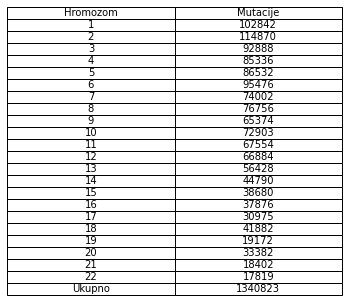

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

chrommut = dict()
i=0
for variant in vcf.fetch():
    i+=1
    chrommut[variant.chrom] = chrommut.get(variant.chrom,0)+1

tableItems = [[i, j]for i,j in chrommut.items()]

title = ['Hromozom' , 'Mutacije']
tableItems.append(['Ukupno', len(mutacije)])

table = plt.table(cellText=tableItems, colLabels= title, loc= 'center', cellLoc='center')

plt.axis('off')
plt.show()

3. [4 boda] Nacrtati sledeće histograme, pri čemu odvojeno prikazati podatke dobijene iz zdravih i obolelih pacijenata (po dva histograma na istom grafiku):  
  3a. [1 boda] Frekvencije ređih alela (minor allele frequency, MAF) za svaku mutaciju u studiji  
  3b. [1 boda] Procenat homozigotnih referentnih uzoraka za svaku mutacija u studiji  
  3c. [1 boda] Procenat homozigotnih alternativnih uzoraka za svaku mutacija u studiji  
  3d. [1 boda] Procenat heterozigotnih uzoraka za svaku mutacija u studiji     
    

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter

def freqCases(m):
  cntCases = Counter([sum(m.samples[s]['GT']) for s in cases])
  summCases = sum(cntCases.values())
  
  homorefCases = cntCases[0] / summCases
  heteroCases  = cntCases[1] / summCases 
  homoaltCases = cntCases[2] / summCases
  maffreqCases = (2*min(homorefCases, homoaltCases) + heteroCases) / (2*summCases) #MAF=(2*Ref. allele)/(2*(Ref.allele + alternate.allele))

  return maffreqCases, homorefCases, homoaltCases, heteroCases

def freqControls(m):
  cntControls = Counter([sum(m.samples[s]['GT']) for s in controls])
  summControls = sum(cntControls.values())

  homorefControls = cntControls[0] / summControls
  heteroControls  = cntControls[1] / summControls 
  homoaltControls = cntControls[2] / summControls
  maffreqControls = (2*min(homorefControls, homoaltControls) + heteroControls) / (2*summControls) 
  
  return maffreqControls, homorefControls, homoaltControls, heteroControls

mafsCases = []
mafsControls = []
homorefsCases = []
homorefsControls = []
homoaltsCases = []
homoaltsControls = []
heterosCases = []
heterosControls = []

for m in mutacije:
    mafCases, refCases, altCases, hetCases = freqCases(m)
    mafControls, refControls, altControls, hetControls = freqControls(m)

    mafsCases.append(mafCases)
    homorefsCases.append(refCases)
    homoaltsCases.append(altCases)
    heterosCases.append(hetCases)
    mafsControls.append(mafControls)
    homorefsControls.append(refControls)
    homoaltsControls.append(altControls)
    heterosControls.append(hetControls)
    

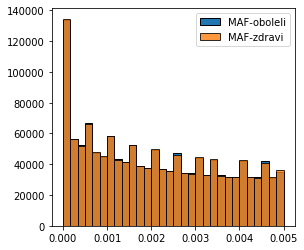

In [ ]:
plt.figure(figsize = (20, 4))
plt.subplot(1,4,1)
plt.hist(mafsCases, bins= 30, edgecolor='black', label = 'MAF-oboleli')
plt.hist(mafsControls, bins= 30, edgecolor='black', alpha=0.8, label = 'MAF-zdravi')
plt.legend()
plt.show()

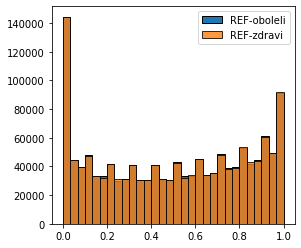

In [ ]:
plt.figure(figsize = (20,4))
plt.subplot(1,4,2)
plt.hist(homorefsCases, bins= 30, edgecolor='black', label = 'REF-oboleli')
plt.hist(homorefsControls, bins= 30, edgecolor='black', alpha=0.8, label = 'REF-zdravi')
plt.legend()
plt.show()

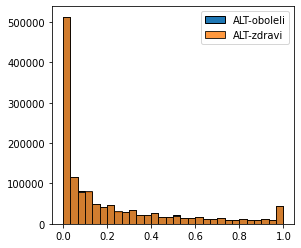

In [ ]:
plt.figure(figsize = (20,4))
plt.subplot(1,4,3)
plt.hist(homoaltsCases, bins= 30, edgecolor='black', label = 'ALT-oboleli')
plt.hist(homoaltsControls, bins= 30, edgecolor='black', alpha=0.8, label = 'ALT-zdravi')
plt.legend()
plt.show()

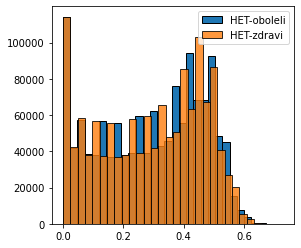

In [ ]:
plt.figure(figsize = (20,4))
plt.subplot(1,4,4)
plt.hist(heterosCases, bins= 30, edgecolor='black', label = 'HET-oboleli')
plt.hist(heterosControls, bins= 30, edgecolor='black', alpha=0.8, label = 'HET-zdravi')
plt.legend()
plt.show()

4. [9 bodova] Identifikovati mutacije koje su statistički značajno asocirane sa datom bolešću (p manje od 0.05, upotrebom hi kvadrat testa).  


4a. [3 boda] Primeniti hi kvadrat test na sve mutacije u studiji 

In [ ]:
import scipy
from scipy.stats import chisquare 
from collections import Counter

def hiKvadratFunc(m):

  caseCnt = Counter([sum(m.samples[s]['GT']) for s in cases])
  caseRefs = 2 * caseCnt[0] + caseCnt[1]
  caseAlts = 2 * caseCnt[2] + caseCnt[1]

  controlCnt = Counter([sum(m.samples[s]['GT']) for s in controls])
  controlRefs = 2 * controlCnt[0] + controlCnt[1]
  controlAlts = 2 * controlCnt[2] + controlCnt[1]

  total = caseAlts+ caseRefs + controlAlts + controlRefs
  
  expected = [(caseRefs + caseAlts)*(caseRefs + controlRefs)/total,
              (controlRefs + controlAlts)*(caseRefs + controlRefs)/total,
              (caseRefs + caseAlts)*(caseAlts + controlAlts)/total,
              (controlRefs + controlAlts)*(caseAlts + controlAlts)/total]
  
  return chisquare([caseRefs, controlRefs, caseAlts, controlAlts], expected).pvalue

In [ ]:
hiKvadrat = [(m.chrom, m.pos, hiKvadratFunc(m)) for m in mutacije]

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


  4b. [2 boda] Da li je potrebno izvršiti korekciju za višestruko testiranje (odgovor dati napismeno)? Ukoliko jeste, objasniti kako, i primeniti je.  

Potrebno je izvrsiti korekciju zato sto u eksperimentu postoji vise od 1300000 mutacija (hipoteza).Koriscena korekcija je Bonferoni(pomerimo granicnu vrednost na t/N, tj. 0.05/broj mutacija) 

  4c. [1 bod] Nacrtati Menhetn grafikon. Voditi računa da su ose adekvatno anotirane i da dužina duž X ose alocirana svakom hromozomu bude proporcionalna dužini hromozoma. 

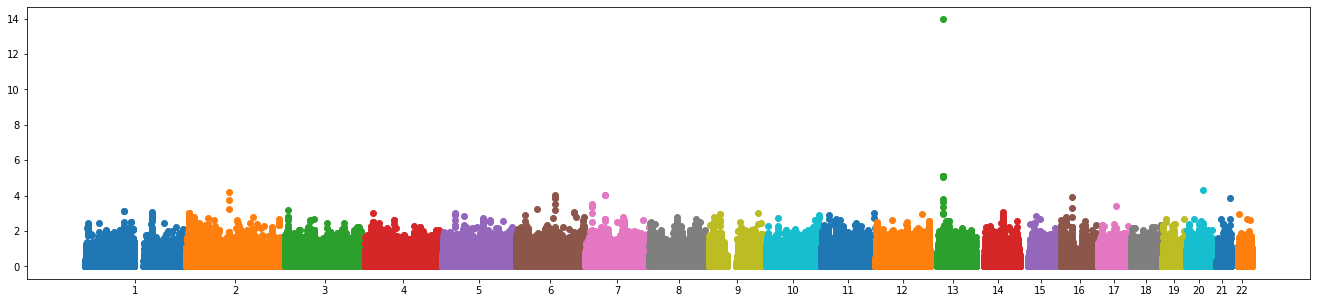

In [ ]:
from itertools import groupby
import numpy as np
import matplotlib.pyplot as plt

results = {key: list(value) for key, value in groupby(hiKvadrat, key=lambda x: x[0])}
idx = 0

plt.figure(figsize=(23, 5))

ticks = []
for i, chrom in enumerate(results):
  pos = [x[1] for x in results[chrom]]
  pos = np.array(pos)
  ticks.append(idx + max(pos)/2)
  pos += idx
  idx = max(pos)
  p = [-np.log10(x[2]) for x in results[chrom]]
  plt.scatter(pos, p)
tickLabels = [str(i) for i in range(1,23)]
plt.xticks(ticks, tickLabels)
plt.show()

  4d. [3 boda] Za svaku mutaciju koja je statistički značajno asocirana sa datom bolešću odrediti da li odstupa od Hardi-Vajnberg ekvilibrijuma (upotrebom hi kvadrat testa). Da li ima takcih mutacija? Da li je ovom prilikom potrebna korekcija za višestruko testiranje (obrazložiti)?

In [ ]:
from collections import Counter

def hwe(m):
  cnt = Counter([sum(sample['GT']) for sample in m.samples.values()])
  summ = sum(cnt.values())

  p = (2*cnt[0]+cnt[1])/(2*summ)
  q = (2*cnt[2]+cnt[1])/(2*summ)

  observed = [cnt[0], cnt[1], cnt[2]]
  expected = [p*p*summ, 2*p*q*summ, q*q*summ] # p^2 + 2pq + q^2 = 1 Hardi-Vajnberg

  return chisquare(observed, expected, ddof=1).pvalue

In [ ]:
hweNot = [hwe(m) < 0.0001 for m in mutacije]
hiKvadratFilter = [hi for hi, hwe in zip(hiKvadrat, hweNot) if not hwe]
resultsFilter = {key: list(value) for key, value in groupby(hiKvadratFilter, key=lambda x: x[0])}

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:5745: RuntimeWarning: invalid value encountered in true_divide
  terms = (f_obs - f_exp)**2 / f_exp


In [ ]:
len(hiKvadrat) - len(hiKvadratFilter)

1790

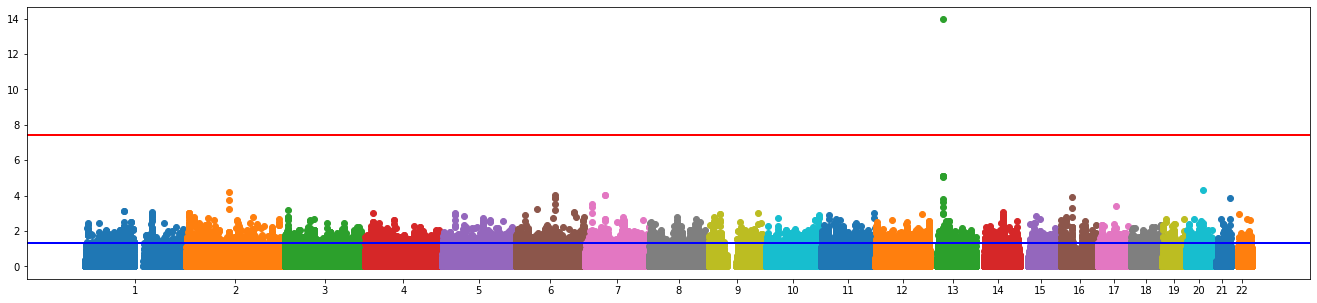

In [ ]:
plt.figure(figsize=(23, 5))
idx = 0
ticks = []
for i, chrom in enumerate(results):
  pos = [x[1] for x in resultsFilter[chrom]]
  pos = np.array(pos)
  ticks.append(idx + max(pos)/2)
  pos += idx
  idx = max(pos)
  p = [-np.log10(x[2]) for x in resultsFilter[chrom]]
  plt.scatter(pos, p)
  plt.axhline(-np.log10(0.05), c='b')  
  plt.axhline(-np.log10(0.05/len(mutacije)), c='r') 
tickLabels = [str(i) for i in range(1,23)]
plt.xticks(ticks, tickLabels)
plt.show()

  5. [5 bodova] Na osnovu mutacije koja pokazuje najjaču asocijaciju sa bolešću odrediti region na referentnom genomu gde se verovatno nalazi gen koji uzrokuje bolest.  
5a. [3 boda] Identifikovati jedan ili više mogućih gena upotrebom [UCSC Genome browsera](https://genome.ucsc.edu/cgi-bin/hgGateway?redirect=manual&source=genome.ucsc.edu). Studija je rađena prema GRCH37 referentnom genomu.   
5b. [2 boda] Izvući podatke o bolestima vezanim za identifikovane gene sa [OMIM sajta](https://omim.org) (nije potrebno prevoditi na srpski jezik). 

In [ ]:
y = [x for x in hiKvadrat if x[0] == '13' if x[1] > 32890000 if x[1] < 32905998]
y

[('13', 32890026, 0.08461982320511298),
 ('13', 32890227, 0.00016350645394743192),
 ('13', 32891798, 0.00023446796657981684),
 ('13', 32894484, 0.9858808798960282),
 ('13', 32894865, 1.1093171328641294e-14),
 ('13', 32894977, nan),
 ('13', 32900149, 0.9166439680811906),
 ('13', 32900933, 0.9799144954425778),
 ('13', 32905265, nan)]

In [ ]:
for i in hiKvadrat: 
  if i[2]<0.05/len(hiKvadrat):
    print(str(i[0]))
    print(str(i[1]))

13
32894865


**Human Gene BRCA2**

Chromosome 13, position 32894865 contains gene called BRCA2.

**Description**: Homo sapiens **Breast** **Cancer** **2**, early on set (BRCA2), mRNA.

**RefSeq Summary (NM_000059)**: Inherited mutations in BRCA1 and this gene, BRCA2, confer increased lifetime risk of developing breast or ovarian cancer. Both BRCA1 and BRCA2 are involved in maintenance of genome stability, specifically the homologous recombination pathway for double-strand DNA repair. The largest exon in both genes is exon 11, which harbors the most important and frequent mutations in breast cancer patients. The BRCA2 gene was found on chromosome 13q12.3 in human.  

**Gene-Phenotype Relationships:**

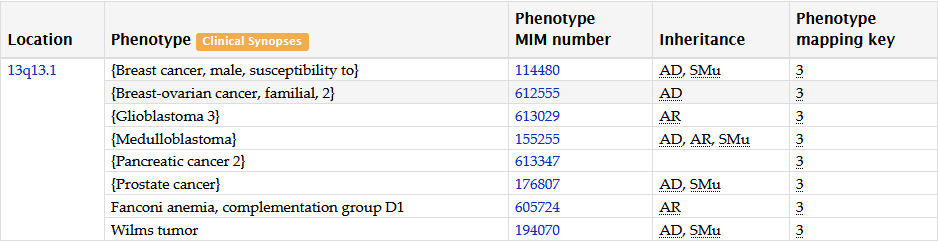